In [1]:
# VIVIAN MAGRI ALCALDI SOARES

import cv2
import numpy as np

from matplotlib import pyplot as plt

# RECEBE UMA MATRIZ DE UMA COR E CALCULA SEU HISTOGRAMA
def histogram(img, height, width):
    hist = np.zeros(256)

    for x in range (0, height):
        for y in range (0, width):
            val = img[x,y]
            hist[val] += 1
    return hist

def main(imagem, colorido):
    # Lê imagem
    file_name = imagem
    img = cv2.imread (file_name, 1)
    cria_histograma (img, colorido)

def cria_histograma (img, colorido):
    # Detalhes do gráfico
    if colorido:
        titulo = 'Histograma de Níveis RGB'
        label = 'Nível de Cor'
    else:
        titulo = 'Histograma de Níveis de Cinza'
        label = 'Nível de Cinza'
    plt.suptitle(titulo , fontweight='bold')
    plt.xlabel(label)
    plt.ylabel('Quantidade de Pixels')
    
    
    # Cada dimensão é uma cor (B, G, R)
    (h, w, dim) = img.shape
    if colorido:
        colour = ('b', 'g', 'r')
        for i in range(0, dim):
            hist = histogram(img[:, :, i], h, w)
            plt.plot(hist,color = colour[i])
    else:
        hist = histogram(img[:, :, 0], h, w)
        plt.plot(hist)
    plt.xlim([0,256])
    plt.show()

In [3]:
# Filtros de suavização
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import math

def smooth_media(img, tamanhoMascara):
	img2 = img.copy()
	meiaMascara = int(tamanhoMascara/2)
	for x in range(meiaMascara, img.shape[0]- meiaMascara):
		for y in range(meiaMascara, img.shape[1]- meiaMascara):
			soma=0
			for vx in range(x-meiaMascara, x+meiaMascara+1):
				for vy in range(y-meiaMascara, y+meiaMascara+1):
					soma = soma + img[vx,vy, 0]
			media = soma / (tamanhoMascara*tamanhoMascara)
			img2[x,y] = [media,media,media] 
	
	return img2

def smooth_mediana(img, tamanhoMascara):
	img2 = img.copy()
	meiaMascara = int(tamanhoMascara/2)
	for x in range(meiaMascara, img.shape[0]- meiaMascara):
		for y in range(meiaMascara, img.shape[1]- meiaMascara):
			valores=[]
			for vx in range(x-meiaMascara, x+meiaMascara+1):
				for vy in range(y-meiaMascara, y+meiaMascara+1):
					
					valores.append(img[vx,vy, 0])
					
			mediana = valores
			mediana.sort()
			mediana = mediana[int(len(mediana)/2)]
			
			img2[x,y] = [mediana, mediana, mediana]  
			
	return(img2)

def mostra (img, img2):
    plt.imshow(img)
    plt.show()
    cria_histograma(img,0)
    plt.imshow(img2)
    plt.show()
    cria_histograma(img2,0)

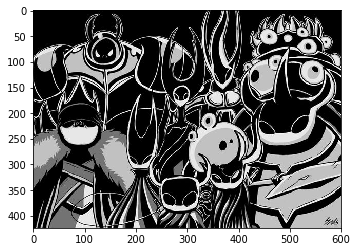

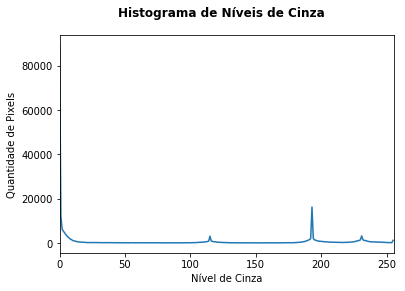

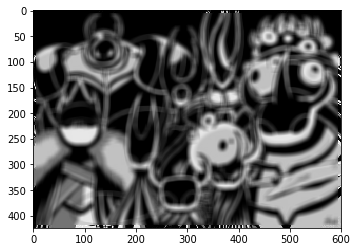

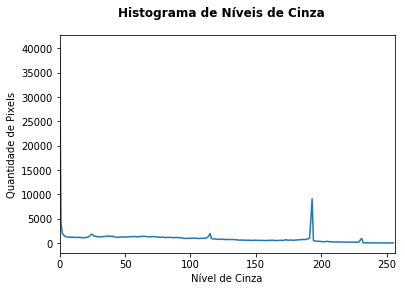

In [16]:
img = cv2.imread('HollowKnite.jpg')
img2 = smooth_media(img, 11)
mostra(img, img2)

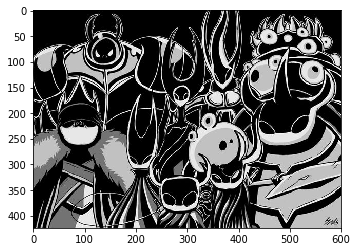

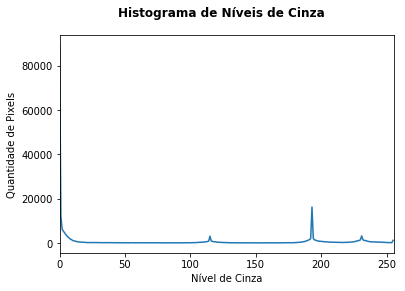

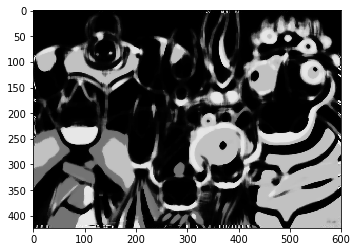

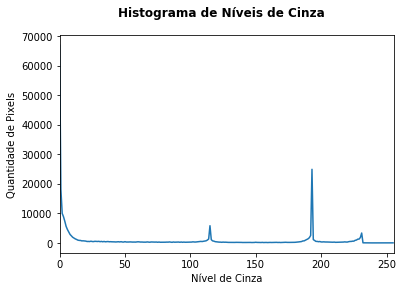

In [17]:
img = cv2.imread('HollowKnite.jpg')
img2 = smooth_mediana(img, 11)
mostra(img, img2)

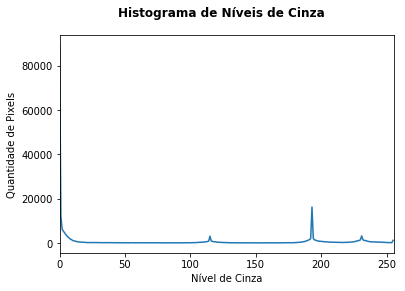

In [2]:
def mascara(img, valores):
	img2 = img.copy()
	meiaMascara = int(len(valores[0])/2)
	for x in range(meiaMascara, img.shape[0]- meiaMascara):
		for y in range(meiaMascara, img.shape[1]- meiaMascara):
			valores=[]
			for vx in range(x-meiaMascara, x+meiaMascara+1):
				for vy in range(y-meiaMascara, y+meiaMascara+1):
					
					valores.append(img[vx,vy, 0])
					
			mediana = valores
			mediana.sort()
			mediana = mediana[int(len(mediana)/2)]
			
			img2[x,y] = [mediana, mediana, mediana]  
			
	return(img2)

In [11]:
valores = [[0]*5]*5
len(valores[0])

5